# References

http://xarray.pydata.org/en/stable/generated/xarray.Dataset.mean.html

https://rabernat.github.io/research_computing_2018/xarray.html

https://github.com/tonybutzer/lite-stac/tree/master/lib/xarrayLib/xarrayLib

http://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign_coords.html

http://xarray.pydata.org/en/stable/generated/xarray.concat.html

http://xarray.pydata.org/en/stable/generated/xarray.merge.html

https://rabernat.github.io/research_computing_2018/xarray.html

https://www.youtube.com/watch?v=Dgr_d8iEWk4
XArray: the power of pandas for multidimensional arrays

https://examples.dask.org/xarray.html

https://rasterio.readthedocs.io/en/latest/topics/reading.html


# Tips

1. use concat instead of merge
2. use join='override'

In [2]:
from playLib.geo_median import clip_by_geojson # clip_by_geojson(infile,outfile,geojson_file)


In [3]:
from playLib.geo_median import my_plot

In [4]:
! ls

00-daily-median-wip-Copy1.ipynb       data
10-try1-daily-median-wip.ipynb	      great_lakes.geojson
80-pip-hell.ipynb		      great_lakes_edit.geojson
99-00-daily-median-1st-attempt.ipynb


In [31]:
!mkdir data

In [32]:
!echo data >>.gitignore

In [5]:
infile = '/vsis3/dev-et-data/NDVI_filled/med2003_2017/med001.250_m_NDVI.tif'
outfile ='data/x.tif'
olena = clip_by_geojson(infile,outfile,'great_lakes_half.geojson')

                                            geometry
0  POLYGON ((-90.00000 49.90000, -85.00000 49.900...
-90.0 -85.0 49.9 40.0
Window(col_off=31509.966447934145, row_off=48.054820359615405, width=2402.6858183151417, height=4757.317920263988)
Pixel Y, X coords: 48, 31509
Pixel Y, X coords: 9, 31509
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 49667, 'height': 14416, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0020810045, 0.0, -155.57238197299998,
       0.0, -0.0020810045, 50.00000229741505)}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4757, 'height': 2402, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0020810045, 0.0, -90.0,
       0.0, -0.0020810045, 49.9)}


In [6]:
type(olena)

numpy.ndarray

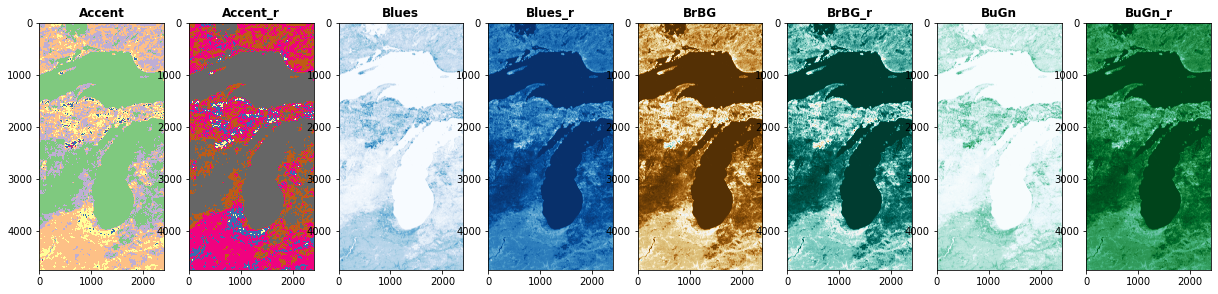

In [7]:
my_plot(olena)

In [8]:
olena.shape

(4757, 2402)

In [41]:
diff_ary = olena-ary4

ValueError: operands could not be broadcast together with shapes (4757,4805) (4805,4757) 

In [43]:
olena.shape

(4757, 4805)

In [44]:
ary4.shape

(4805, 4757)

In [45]:
url='data/x.tif'
da = xr.open_rasterio(url)

In [46]:
da.shape

(1, 4805, 4757)

In [60]:
olena_readback_ary = da.band.values

In [61]:
olena_readback_ary.shape

()

In [53]:
da

<xarray.DataArray (band: 1, y: 4805, x: 4757)>
array([[[0.107817, 0.10309 , ..., 0.107001, 0.10804 ],
        [0.107817, 0.10309 , ..., 0.107001, 0.10804 ],
        ...,
        [0.237722, 0.238769, ..., 0.416255, 0.405322],
        [0.241142, 0.237546, ..., 0.414193, 0.403564]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x        (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.11 -80.1 -80.1
Attributes:
    transform:      (0.0020810045, 0.0, -90.0, 0.0, -0.0020810045, 49.9)
    crs:            +init=epsg:4326
    res:            (0.0020810045, 0.0020810045)
    is_tiled:       0
    nodatavals:     (-3.4028234663852886e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [62]:
da = da.squeeze().drop(labels='band')

In [63]:
da

<xarray.DataArray (y: 4805, x: 4757)>
array([[0.107817, 0.10309 , 0.100333, ..., 0.104485, 0.107001, 0.10804 ],
       [0.107817, 0.10309 , 0.100333, ..., 0.104485, 0.107001, 0.10804 ],
       [0.109065, 0.102559, 0.100173, ..., 0.106013, 0.107501, 0.108746],
       ...,
       [0.241406, 0.239032, 0.238721, ..., 0.42699 , 0.415579, 0.407092],
       [0.237722, 0.238769, 0.24019 , ..., 0.427107, 0.416255, 0.405322],
       [0.241142, 0.237546, 0.239406, ..., 0.424365, 0.414193, 0.403564]],
      dtype=float32)
Coordinates:
  * y        (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x        (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.11 -80.1 -80.1
Attributes:
    transform:      (0.0020810045, 0.0, -90.0, 0.0, -0.0020810045, 49.9)
    crs:            +init=epsg:4326
    res:            (0.0020810045, 0.0020810045)
    is_tiled:       0
    nodatavals:     (-3.4028234663852886e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [64]:
olena_readback_ary = da.values

In [65]:
olena_readback_ary.shape

(4805, 4757)

In [66]:
ary4.shape

(4805, 4757)

In [67]:
diff_ary2 = olena_readback_ary - ary4

In [68]:
diff_ary2.max()

0.7435

In [69]:
diff_ary2.min()

-0.14176282

In [70]:
ary4

array([[0.105825  , 0.09836354, 0.09110972, ..., 0.10299375, 0.10489306,
        0.10589166],
       [0.105825  , 0.09836354, 0.09110972, ..., 0.10299375, 0.10489306,
        0.10589166],
       [0.10569028, 0.09789479, 0.08978298, ..., 0.10463229, 0.10600278,
        0.10707118],
       ...,
       [0.23252639, 0.23385105, 0.23690626, ..., 0.28398195, 0.2743104 ,
        0.26526147],
       [0.23554236, 0.23526388, 0.2384868 , ..., 0.2869729 , 0.2750094 ,
        0.26397085],
       [0.23548576, 0.23688784, 0.23860729, ..., 0.2791882 , 0.26851043,
        0.2596375 ]], dtype=float32)